In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json

In [2]:
# load posts
with open('posts.json', 'r') as f:
    posts = json.load(f)
print("Raw posts loaded:", len(posts))

Raw posts loaded: 523


In [3]:
users = set([post['user'] for post in posts.values()])
print(len(users))

210


In [5]:
quotes = []
for post in posts.values():
    quotes += post['quotes']
quotes = set(quotes)
quotes_in = [quote for quote in quotes if quote in users]
quotes_not_in = [quote for quote in quotes if quote not in users]
print(len(quotes_in))
print(len(quotes_not_in))
""" for q in quotes_not_in:
    print(q) """

94
10


' for q in quotes_not_in:\n    print(q) '

In [11]:
# Make networkx graph using users as nodes and quotes as edges
G = nx.Graph()
G.add_nodes_from(users)
for post in posts.values():
    user = post['user']
    quotes = set(post['quotes'])
    for quote in quotes:
        G.add_edge(user, quote)

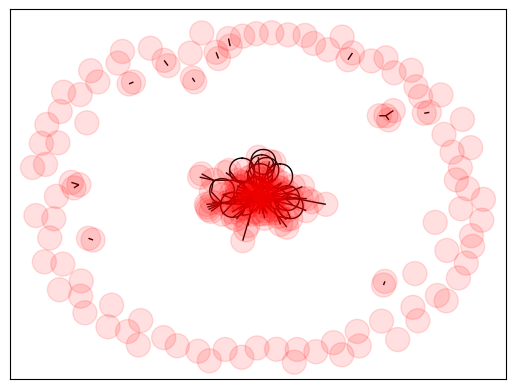

204


In [16]:
color_map = [ '#FF000020' for _ in G.nodes ]
nx.draw_networkx(G, with_labels=0, node_color=color_map)
plt.show()
print(len(G.edges))

111


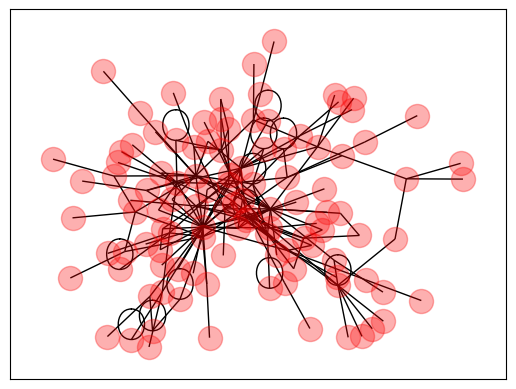

4


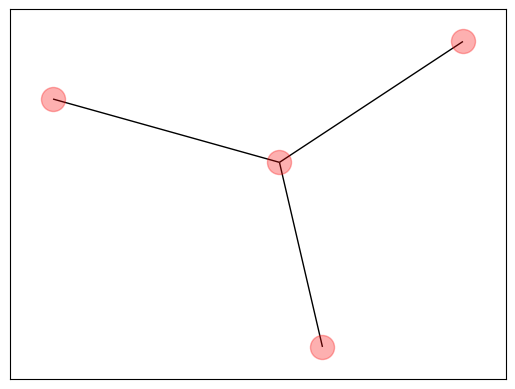

3


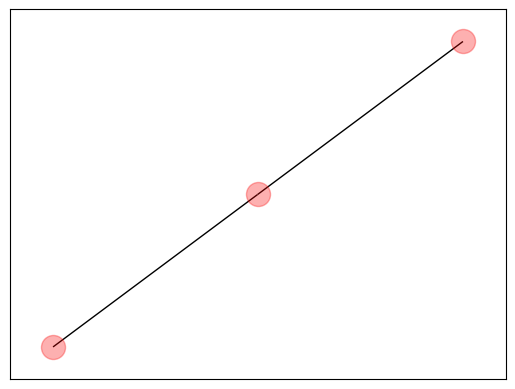

2


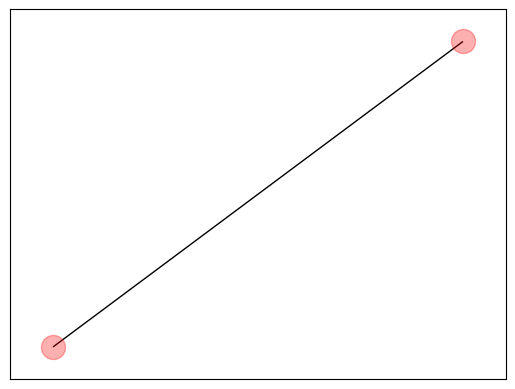

2


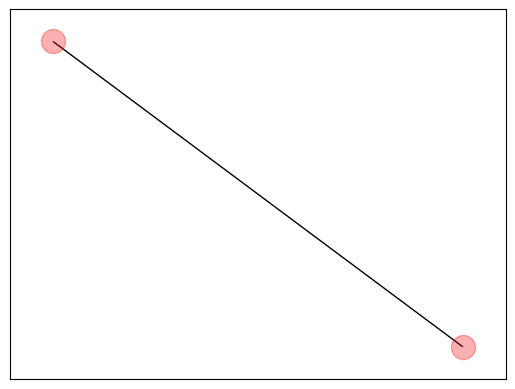

2


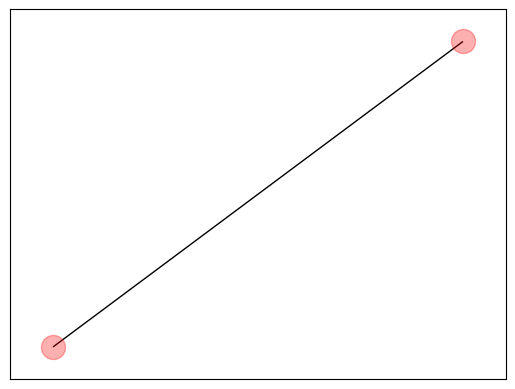

2


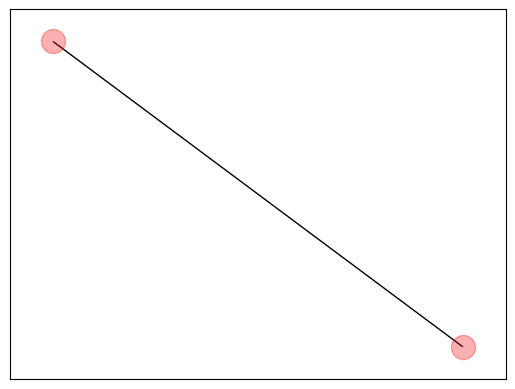

2


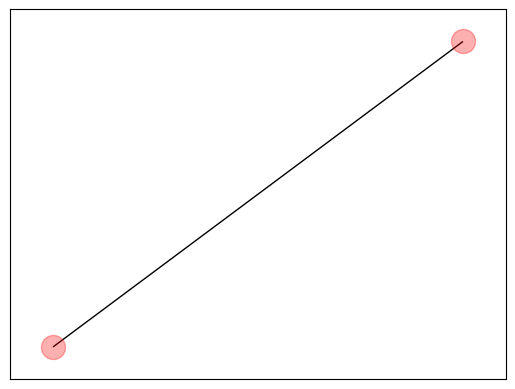

2


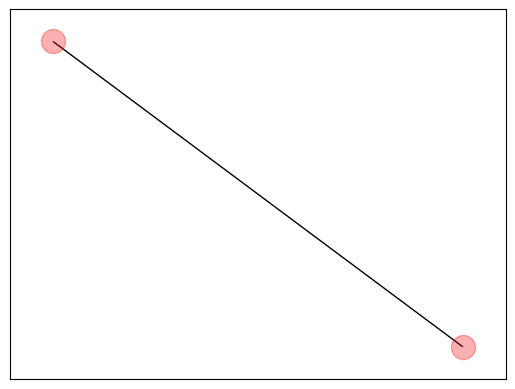

2


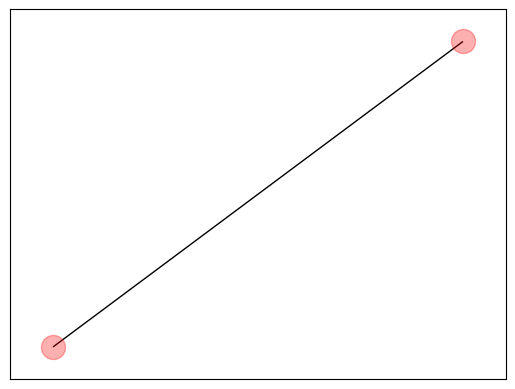

2


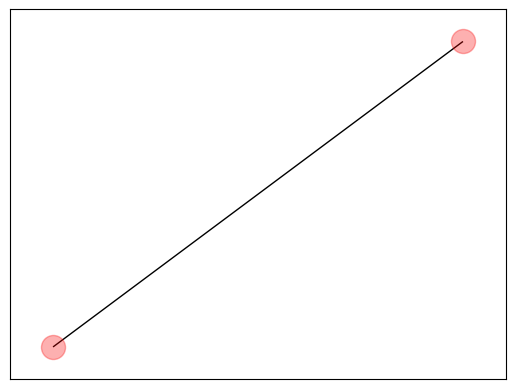

2


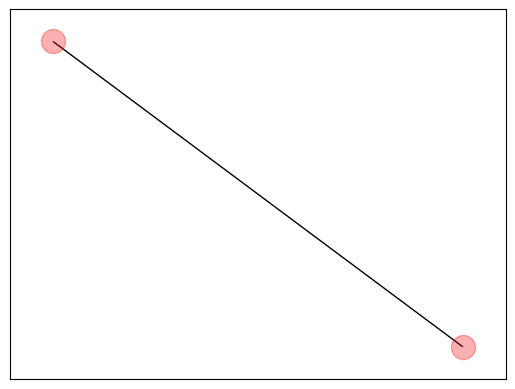

In [26]:
ccs = sorted(nx.connected_components(G), key=len, reverse=True)
for cc in ccs:
    if len(cc) > 1:
        print(len(cc))
        sg = G.subgraph(cc)
        nx.draw_networkx(sg, with_labels=0, node_color='#FA050550')
        plt.show()

In [8]:
G = nx.Graph()
G.add_nodes_from(['a', 'b', 'c', 'd'])
G.add_edge('a', 'e')